## Laboratorio I - Femicidios - Grupo 12: Clerici, Pérez

# Laboratorio I



In [22]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')

## Estadísticas oficiales de femicidio

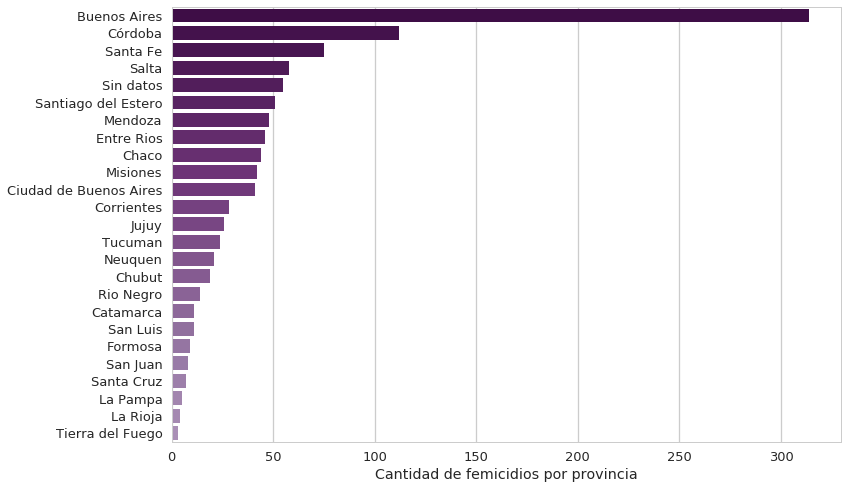

In [23]:
# Cargar dataset
fig = plt.figure(figsize=(12,8))
dataset = pd.read_csv('http://datos.jus.gob.ar/dataset/27bb9b2c-521b-406c-bdf9-98110ef73f34/resource/a2e1c899-cbaa-4bf6-b623-6648f150cab0/download/registro-de-femicidios-2018-04-13.csv', 
                      encoding='utf8')
# quitar tilde de nombre de columna número
dataset.loc[:,'numero'] = dataset[u'número']

# graficar violencia por provincia
ax = sns.countplot(data=dataset, y='lugar_hecho', 
                   palette=sns.color_palette("PRGn", 100), 
                   order=dataset['lugar_hecho'].value_counts().index
                  )
ax.set_ylabel('')
ax.set_xlabel('Cantidad de femicidios por provincia')
plt.show()

Buscamos los datos del Censo 2010 porque nos interesa pesar la cantidad de femicidios por cantidad de habitantes.
Los datos son obtenidos de https://www.sig.indec.gov.ar/censo2010/ y se encuentran en el archivo `numero-habitantes-provincia-censo2010.txt`.

In [24]:
censo2010 = pd.read_csv('numero-habitantes-provincia-censo2010.csv')
censo2010

,provincia,densidad_poblacional_hab_km2,numero_habitantes
0,Ciudad de Buenos Aires,14450.8,2890151
1,Tucuman,64.3,1448188
2,Buenos Aires,50.8,15625084
3,Misiones,37.0,1101593
4,Santa Fe,24.0,3194537
5,Córdoba,20.0,3308876
6,Entre Rios,15.7,1235994
7,Jujuy,12.7,673307
8,Mendoza,11.7,1738929
9,Corrientes,11.3,992595


In [25]:
dataset['lugar_hecho'].value_counts()

Buenos Aires              314
Córdoba                   112
Santa Fe                   75
Salta                      58
Sin datos                  55
Santiago del Estero        51
Mendoza                    48
Entre Rios                 46
Chaco                      44
Misiones                   42
Ciudad de Buenos Aires     41
Corrientes                 28
Jujuy                      26
Tucuman                    24
Neuquen                    21
Chubut                     19
Rio Negro                  14
Catamarca                  11
San Luis                   11
Formosa                     9
San Juan                    8
Santa Cruz                  7
La Pampa                    5
La Rioja                    4
Tierra del Fuego            3
Name: lugar_hecho, dtype: int64

In [26]:
# femicidios por provincia
ds = dataset['lugar_hecho'].value_counts()
# habitantes por provincia
cs = pd.Series(censo2010['numero_habitantes'].get_values(), index=censo2010['provincia'])
fem_x_hab = ds.div(cs)

In [27]:
fem_x_hab = fem_x_hab.dropna().sort_values(ascending=False)

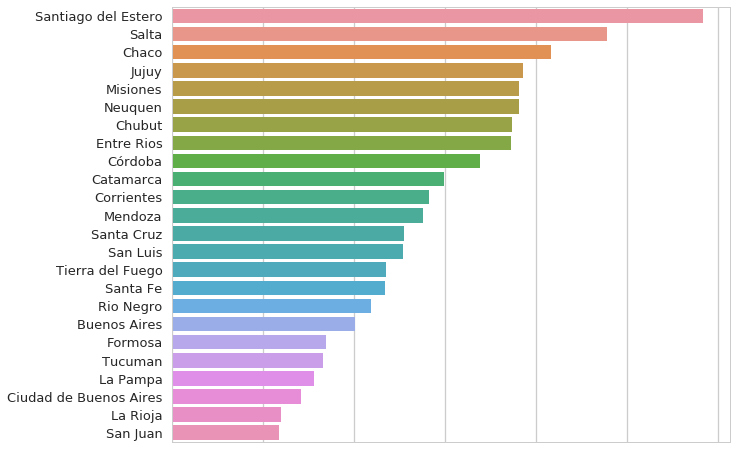

In [28]:
fig2 = plt.figure(figsize=(10,8))
ax1 = sns.barplot(x=fem_x_hab.get_values(), y=fem_x_hab.index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

# Datos a buscar para realizar comparaciones

* PBI por provincia
* Porcentaje de personas en situación de pobreza e indigencia
* Inversión en seguridad
* Inversión en educación
* Inversión en políticas de género e inclusión

***Ahora veremos la distribución de edad de las victimas mujeres***

In [72]:
#sacamos la edad de solo las mujeres
edad_mujer = dataset.where((dataset['identidad_genero']=='MUJER') & (dataset['edad']!="Sin datos"))
edad_mujer = edad_mujer.dropna()['edad'].apply(float)

#hay un dato mal cargado que dice que hay una mujer de 999 años
edad_mujer = edad_mujer.where(edad_mujer < 200.0)
edad_mujer.describe()

count    918.000000
mean      32.345316
std       14.768351
min        0.000000
25%       21.000000
50%       30.000000
75%       42.000000
max       90.000000
Name: edad, dtype: float64

La media es: 32.34531590413943
La mediana: 30.0
Y la moda: 0    22.0
dtype: float64



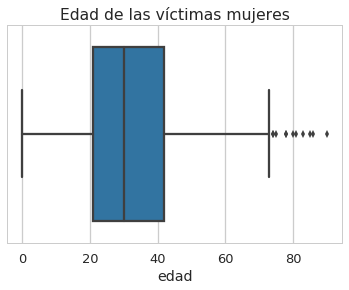

In [110]:
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(edad_mujer.mean()),str(edad_mujer.median())
                                                                    , str(edad_mujer.mode())))
a = sns.boxplot(edad_mujer)
a.set_title("Edad de las víctimas mujeres")
plt.show()

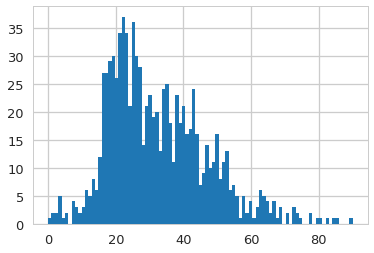

In [90]:
ax3=edad_mujer.hist(bins=91)



In [142]:
cant_mujeres = edad_mujer.count()
def pmf(x,serie):
    sum = 0
    for i in serie:
        if i == x:
            sum =  sum + 1
    sum = sum/(serie.dropna().size)
    return sum

def cmf(x,serie):
    sum = 0
    for i in serie.drop_duplicates():
        if i<=x:
            sum = sum + pmf(i,serie)
    return sum

cmf(100,edad_mujer)


0.9999999999999999

**Ahora la distribución de las víctimas hombres(vinculadas)**

In [68]:
#sacamos la edad de solo los hombres
edad_hombre = dataset.where((dataset['identidad_genero'] == 'HOMBRE')&(dataset['edad']!="Sin datos"))
edad_hombre = edad_hombre.dropna()['edad'].apply(float)
edad_hombre.describe()

count    35.000000
mean     21.571429
std      19.315166
min       0.000000
25%       5.000000
50%      20.000000
75%      32.000000
max      70.000000
Name: edad, dtype: float64

La media es: 21.571428571428573
La mediana: 20.0
Y la moda: 0    3.0
1    4.0
2    7.0
dtype: float64



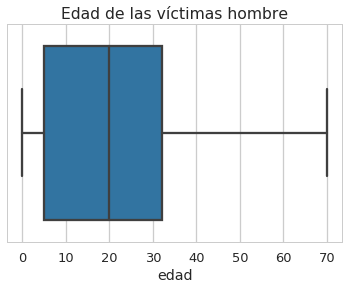

In [112]:
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(edad_hombre.mean()),str(edad_hombre.median())
                                                                    , str(edad_hombre.mode())))
hombre_box = sns.boxplot(edad_hombre)
hombre_box.set_title("Edad de las víctimas hombre")
plt.show()